## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [2]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

In [3]:
estados = gpd.read_file('Estados/conjunto_de_datos')

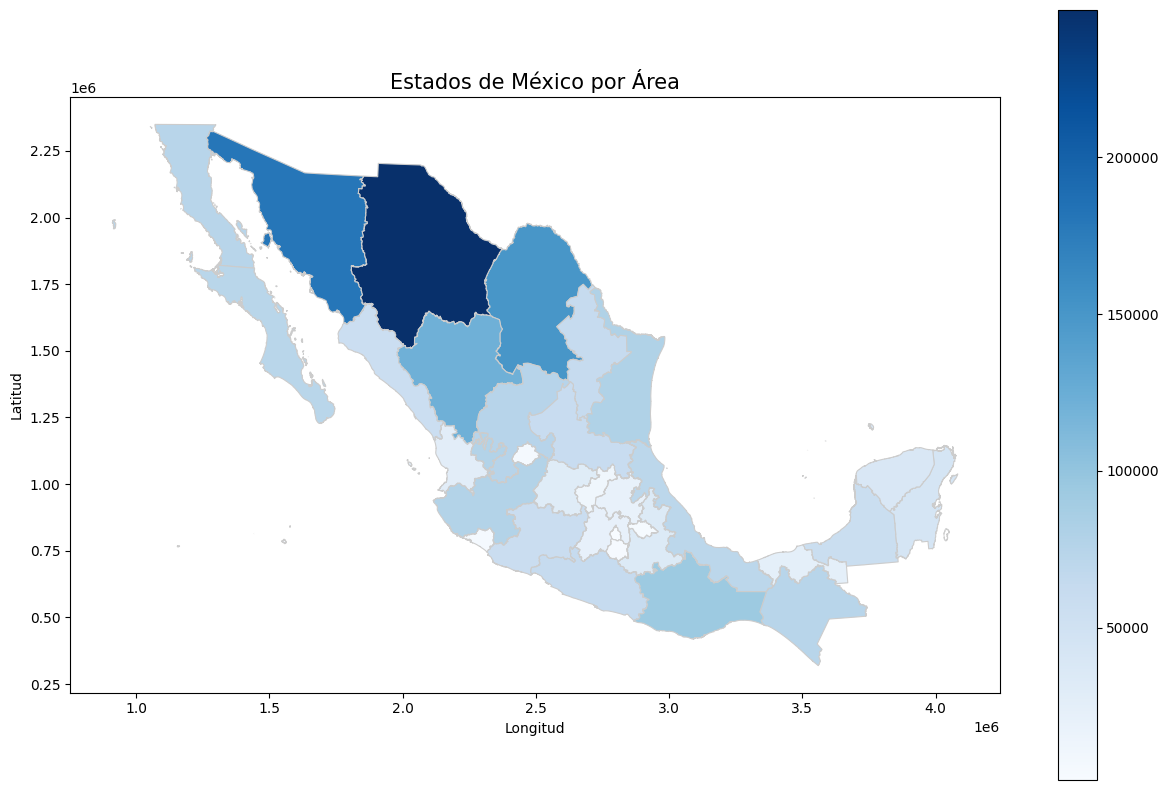

In [21]:
estados["area"] = estados.area / 10**6
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

estados.plot(column='area', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Estados de México por Área', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.show()


#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [4]:
escuelas = gpd.read_file('Escuelas/conjunto_de_datos/denue_inegi_61_.shp')

El área total ocupada por las zonas buffer es de 303014.30 km²


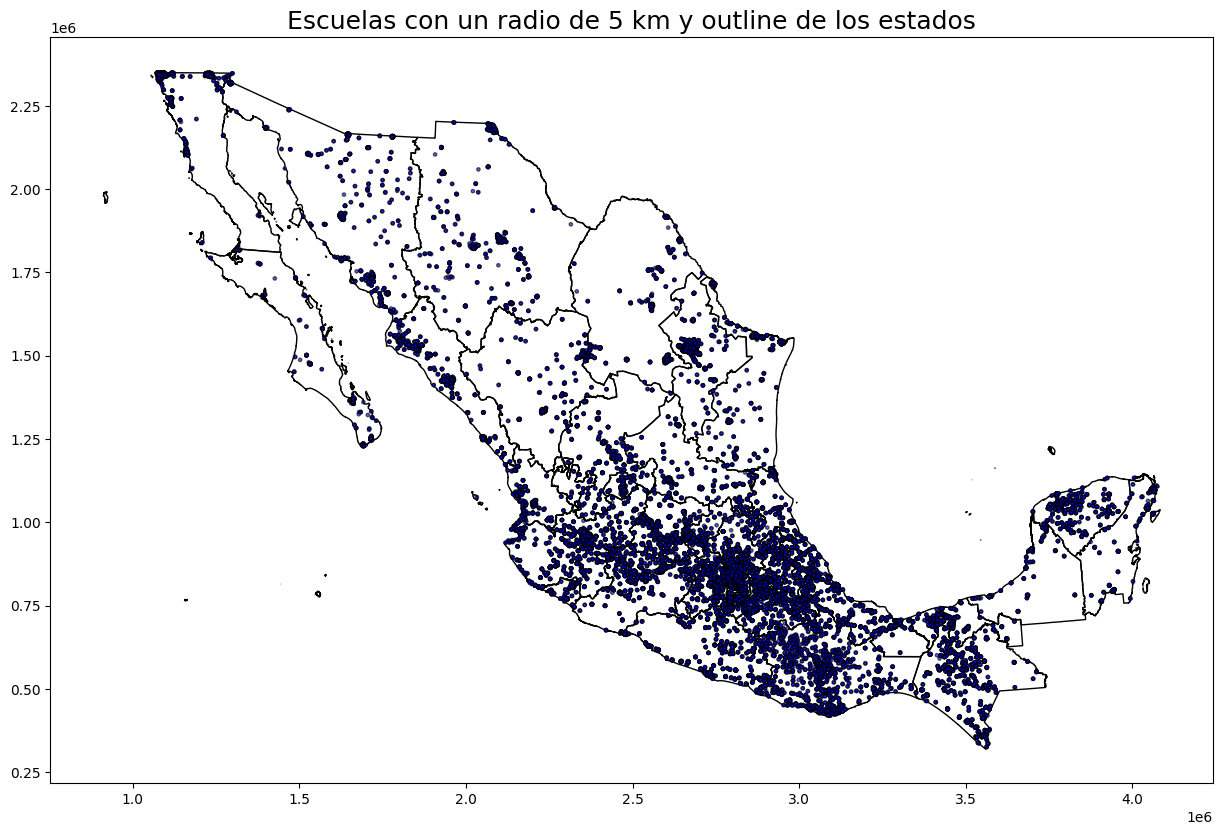

In [26]:

estados_utm = estados.to_crs(epsg=6362)
escuelas_utm = escuelas.to_crs(epsg=6362)
# Crear un buffer de 5 km alrededor de todas las escuelas
escuelas_buffer = escuelas_utm.buffer(5000)
#podemos usar la suma si queremos que haya "overlaps"
#pero mejor usar la union
area_total = escuelas_buffer.unary_union.area / 10**6 
print(f"El área total ocupada por las zonas buffer es de {area_total:.2f} km²")

fig, ax = plt.subplots(figsize=(15, 10))
estados_utm.plot(ax=ax, edgecolor='black', facecolor='none')  
escuelas_buffer.plot(ax=ax, color='blue', edgecolor='black', alpha=0.6)  

ax.set_title("Escuelas con un radio de 5 km y outline de los estados", fontsize=18)
plt.show()

#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [25]:
cdmx_geometry = estados[estados["NOMGEO"] == 'Ciudad de México'].geometry.iloc[0]
distancias_list = []


for index, row in estados.iterrows():
    if row["NOMGEO"] != 'Ciudad de México':
        estado = row["NOMGEO"]
        estado_geometry = row.geometry
        nearest_points_pair = nearest_points(cdmx_geometry.boundary, estado_geometry.boundary)
        distancia = nearest_points_pair[0].distance(nearest_points_pair[1]) / 1000  # Convertir a kilómetros
        distancias_list.append({"Estado": estado, "Distancia de fronteras de CDMX": distancia})


distancias_df = pd.DataFrame(distancias_list)
distancias_df = distancias_df.sort_values(by="Distancia de fronteras de CDMX", ascending=True)
print(distancias_df)

                             Estado  Distancia de fronteras de CDMX
15                          Morelos                        0.000000
13                           México                        0.000000
11                          Hidalgo                       28.546022
19                           Puebla                       30.854579
27                         Tlaxcala                       35.368936
10                         Guerrero                       50.114395
14              Michoacán de Ocampo                       88.191628
20                        Querétaro                       96.522395
28  Veracruz de Ignacio de la Llave                      103.187654
9                        Guanajuato                      128.951548
18                           Oaxaca                      145.749998
22                  San Luis Potosí                      175.711533
12                          Jalisco                      305.170985
26                       Tamaulipas             

#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

In [7]:
servicios = gpd.read_file('Servicios/conjunto_de_datos/denue_inegi_54_.shp')

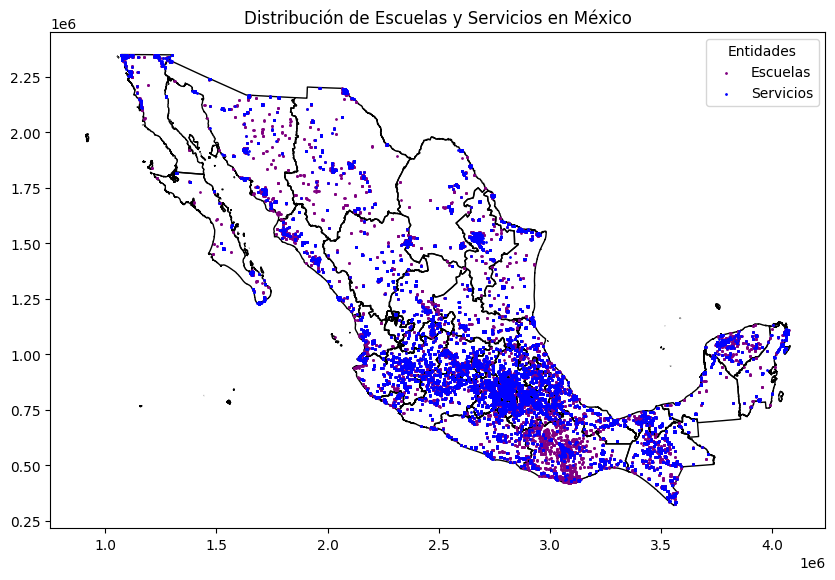

In [15]:
regex = r"(?i)(primaria|escuela básica|escuela elemental|secundaria|escuela media|educación media|preparatoria|bachillerato|prepa|colegio)"
escuelas = escuelas[escuelas['nom_estab'].str.extract(regex, expand=False).notna()]

fig, ax = plt.subplots(figsize=(10, 10))
#ploytear estados
estados_utm = estados.to_crs(epsg=6362)
estados_utm.plot(ax=ax, edgecolor='black', facecolor='none')

escuelas = escuelas.to_crs(epsg=6362)
escuelas.plot(ax=ax, color='purple', markersize=1, label='Escuelas')

servicios = servicios.to_crs(epsg=6362)
servicios.plot(ax=ax, color='blue', markersize=1, label='Servicios')

plt.legend(title='Entidades')
plt.title('Distribución de Escuelas y Servicios en México')
plt.show()

**Conclusion**

Es claro que las escuelas siempre van acompañadas de algún tipo de servicio, en rara ocación las escuelas no tiene un servicios sercaco. Igualmente la distribución de escuelas y servicios es muy parecida. No exite alguna concetración de escuelas sin servicios y viceversa.